# Introduction to Data Manipulation with Pandas

In [1]:
import pandas as pd

In [2]:
pd.__version__

'0.24.2'

In [3]:
pd.Series(['San Francisco','San Jose','Sacramento'])

0    San Francisco
1         San Jose
2       Sacramento
dtype: object

In [4]:
city_names = pd.Series(['San Francisco','San Jose','Sacramento'])

population = pd.Series([852469, 1015785, 485199])



In [5]:
pd.DataFrame({'City Name': city_names, 'Population': population})

,City Name,Population
0,San Francisco,852469
1,San Jose,1015785
2,Sacramento,485199


Loading an entire file into a Dataframe using the California Housing Data:

In [6]:
california_housing_dataframe = pd.read_csv("https://download.mlcc.google.com/mledu-datasets/california_housing_train.csv", sep=",")

In [7]:
california_housing_dataframe.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000
mean,-119.562108,35.625225,28.589353,2643.664412,539.410824,1429.573941,501.221941,3.883578,207300.912353
std,2.005166,2.137340,12.586937,2179.947071,421.499452,1147.852959,384.520841,1.908157,115983.764387
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.790000,33.930000,18.000000,1462.000000,297.000000,790.000000,282.000000,2.566375,119400.000000
50%,-118.490000,34.250000,29.000000,2127.000000,434.000000,1167.000000,409.000000,3.544600,180400.000000
75%,-118.000000,37.720000,37.000000,3151.250000,648.250000,1721.000000,605.250000,4.767000,265000.000000
max,-114.310000,41.950000,52.000000,37937.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


To display the first five rows of the entire dataset

In [8]:
california_housing_dataframe.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


Plot a quick histogram to see the distribution of values in a column.

In [9]:
california_housing_dataframe.hist('housing_median_age')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x115d05dd8>]],
      dtype=object)

Accessing Data

In [10]:
cities = pd.DataFrame({ 'City name': city_names, 'Population': population })

print(type(cities['City name']))
cities['City name']




<class 'pandas.core.series.Series'>


0    San Francisco
1         San Jose
2       Sacramento
Name: City name, dtype: object

In [11]:
print(type(cities['City name'][1]))
cities['City name'][1]

<class 'str'>


'San Jose'

In [12]:
print(type(cities[0:2]))
cities[0:2]

<class 'pandas.core.frame.DataFrame'>


,City name,Population
0,San Francisco,852469
1,San Jose,1015785


Manipulating Data
We may apply Python basic arithmetic operations to Series:

In [13]:
population

0     852469
1    1015785
2     485199
dtype: int64

In [14]:
population/1000

0     852.469
1    1015.785
2     485.199
dtype: float64

NumPy is a popular toolkit for scientific computing. Pandas series objects can be used as arguments to most NumPy functions:

In [15]:
import numpy as np
np.log(population)

0    13.655892
1    13.831172
2    13.092314
dtype: float64

The example below creates a new Series object that indicates wether population is over one million:


In [16]:
population.apply(lambda val: val > 1000000)

0    False
1     True
2    False
dtype: bool

Modifying Dataframes is also straightforward. For example, the following code adds two Series to an existing DataFrame:

In [17]:
cities['Area square miles'] = pd.Series([46.87, 176.53, 97.92])
cities['Population density'] = cities['Population'] / cities['Area square miles']
cities

,City name,Population,Area square miles,Population density
0,San Francisco,852469,46.87,18187.945381
1,San Jose,1015785,176.53,5754.177760
2,Sacramento,485199,97.92,4955.055147


In [18]:
cities['Is wide and has saint name'] = (cities['Area square miles'] > 50) & cities['City name'].apply(lambda name: name.startswith('San'))
cities

,City name,Population,Area square miles,Population density,Is wide and has saint name
0,San Francisco,852469,46.87,18187.945381,False
1,San Jose,1015785,176.53,5754.177760,True
2,Sacramento,485199,97.92,4955.055147,False


Reindexing is a great way to shuffle and randomize iteams in a DataFrame.

In [19]:
cities.reindex([2,0,1])

,City name,Population,Area square miles,Population density,Is wide and has saint name
2,Sacramento,485199,97.92,4955.055147,False
0,San Francisco,852469,46.87,18187.945381,False
1,San Jose,1015785,176.53,5754.177760,True


In [20]:
cities.reindex(np.random.permutation(cities.index))

,City name,Population,Area square miles,Population density,Is wide and has saint name
0,San Francisco,852469,46.87,18187.945381,False
1,San Jose,1015785,176.53,5754.177760,True
2,Sacramento,485199,97.92,4955.055147,False


The reindex method allows index values that are not in the original DataFrame's index values. Try and see what happens if you use such values...

In [21]:
cities.reindex([0, 4, 5, 2])

,City name,Population,Area square miles,Population density,Is wide and has saint name
0,San Francisco,852469.0,46.87,18187.945381,False
4,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN
2,Sacramento,485199.0,97.92,4955.055147,False


This behavior is desirable because indexes are often strings pulled from the actual data.
In this case, allowing "missing" indices makes it easy to reindex using an external list, as you don't have to worry about sanitizing the input.

# First Steps with TensorFlow

## Our aim: To Learn fundamental TensorFlow concepts


In [22]:
from __future__ import print_function

import math

from IPython import display
from matplotlib import cm
from matplotlib import gridspec
from matplotlib import pyplot as plt

import numpy as np
import pandas as pd
from sklearn import metrics
import tensorflow as tf
from tensorflow.python.data import Dataset

tf.logging.set_verbosity(tf.logging.ERROR)
pd.options.display.max_rows = 10
pd.options.display.float_format = '{:.1f}'.format


Now we will load our dataset

In [23]:
california_housing_dataframe = pd.read_csv("https://download.mlcc.google.com/mledu-datasets/california_housing_train.csv", sep=",")

In [24]:
california_housing_dataframe

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.3,34.2,15.0,5612.0,1283.0,1015.0,472.0,1.5,66900.0
1,-114.5,34.4,19.0,7650.0,1901.0,1129.0,463.0,1.8,80100.0
2,-114.6,33.7,17.0,720.0,174.0,333.0,117.0,1.7,85700.0
3,-114.6,33.6,14.0,1501.0,337.0,515.0,226.0,3.2,73400.0
4,-114.6,33.6,20.0,1454.0,326.0,624.0,262.0,1.9,65500.0
...,...,...,...,...,...,...,...,...,...
16995,-124.3,40.6,52.0,2217.0,394.0,907.0,369.0,2.4,111400.0
16996,-124.3,40.7,36.0,2349.0,528.0,1194.0,465.0,2.5,79000.0
16997,-124.3,41.8,17.0,2677.0,531.0,1244.0,456.0,3.0,103600.0
16998,-124.3,41.8,19.0,2672.0,552.0,1298.0,478.0,2.0,85800.0


We will randomize data to avoid any pathological ordering effects that will affect the performance of Stochastic Gradient Descent.
We will also scalre median_house_value to be in units of thousands.

In [25]:
california_housing_dataframe = california_housing_dataframe.reindex(np.random.permutation(california_housing_dataframe.index))
california_housing_dataframe["median_house_value"] /= 1000.0
california_housing_dataframe

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
9897,-119.7,34.4,31.0,1524.0,383.0,1257.0,398.0,2.6,250.0
844,-117.1,32.7,35.0,3200.0,725.0,1723.0,610.0,1.9,95.6
9341,-119.2,34.2,30.0,1096.0,231.0,741.0,229.0,3.9,234.7
9683,-119.6,36.7,29.0,1963.0,392.0,1208.0,398.0,2.6,73.0
1941,-117.3,34.5,8.0,6246.0,1273.0,3883.0,1264.0,2.8,98.2
...,...,...,...,...,...,...,...,...,...
10480,-120.4,38.0,33.0,2177.0,404.0,891.0,383.0,3.2,105.2
3857,-118.0,33.9,31.0,2237.0,431.0,1135.0,434.0,4.5,267.9
4815,-118.1,34.0,20.0,1911.0,472.0,1407.0,465.0,2.8,163.0
10543,-120.4,35.0,39.0,1228.0,379.0,851.0,341.0,1.9,113.3


It is good practise to get to know the data a little bit before you work with it.
We will print a quick statistical summary of the data.

In [26]:
california_housing_dataframe.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17000.0,17000.0,17000.0,17000.0,17000.0,17000.0,17000.0,17000.0,17000.0
mean,-119.6,35.6,28.6,2643.7,539.4,1429.6,501.2,3.9,207.3
std,2.0,2.1,12.6,2179.9,421.5,1147.9,384.5,1.9,116.0
min,-124.3,32.5,1.0,2.0,1.0,3.0,1.0,0.5,15.0
25%,-121.8,33.9,18.0,1462.0,297.0,790.0,282.0,2.6,119.4
50%,-118.5,34.2,29.0,2127.0,434.0,1167.0,409.0,3.5,180.4
75%,-118.0,37.7,37.0,3151.2,648.2,1721.0,605.2,4.8,265.0
max,-114.3,42.0,52.0,37937.0,6445.0,35682.0,6082.0,15.0,500.0


Our data is now ready to be manipulated. We will build our first model with TensorFlow.

Our aim is to predict median_house_value, which will be our target **label**. We will use total_rooms as our input **feature**.

It is important to note that our data is at the city block level, and so this feature represents the total number of rooms in that block.

To train our model, we will use the LinearRegressor interface provided by the TensorFlow Estimator API. 

# Step 1: Define Features and Configure Feature Columns

To import our data into TensorFlow we must specify what type of data each feature contains. There are two main types of data we'll primarily be working with:

* **Categorical Data:** This is textual data. In our dataset this would comprise home style, words in a real-estate ad.
* **Numerical Data:** Data that is a number (integer or float) and that you want to treat as a number. We will see instances where we might want to treat numerical data (such as a postal code) as if it were categorical.

In TensorFlow we will indicate a feature's data type using a construct called a feature column. Feature columns store only a description of the feature data; they do not contain the feature data itself.

To start, we will use just one numeric input feature, total_rooms. The following code pulls the total_rooms data from our california_housing_dataset and defines the feature column using numeric_column, which sepcifies that our data is numeric.

In [27]:
#Define the input feature: total_rooms
my_feature = california_housing_dataframe[["total_rooms"]]

#Configure a numeric feature column for total_rooms.

feature_columns = [tf.feature_column.numeric_column("total_rooms")]

In [28]:
feature_columns

[NumericColumn(key='total_rooms', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None)]

# Step 2: Define the Target

Now we will define our target variable (label), which is the median_house_value. We will pull this data from our california_housing_dataframe:

In [29]:
#Define the label.
targets = california_housing_dataframe["median_house_value"]

In [30]:
type(targets)

pandas.core.series.Series

# Step 3: Configure the LinearRegressor

Now we will configure a linear regression model using TensorFlow's Linear Regressor. We will train this model using the GradientDescentOptimizer, which implements a Mini-Batch Stochastic Gradient Descent (SGD). The learning_rate argument controls the size of the gradient step.

We will also apply ***gradient clipping*** to our optimizer via clip_gradient_by_norm. Gradient clipping will ensure that the magnitude of the gradients do not become too large during training. This problem called the ***exploding gradient problem*** is the tendency for gradients in a deep neural network to become very steep, resulting in a very large update to the weights of each node in a deep neural network. This problem will likely cause our gradient descent to fail.

In [31]:
#Use Gradient Descent as the optimizer for the training model.
my_optimizer = tf.train.GradientDescentOptimizer(learning_rate = 0.0000001)
#Apply Gradient Clipping
my_optimizer = tf.contrib.estimator.clip_gradients_by_norm(my_optimizer, 5.0)


For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
If you depend on functionality not listed there, please file an issue.



In [32]:
#Configure the linear regression model with our feature columns
#Set a learning rate of 0.0000001 for Gradient Descent.

linear_regressor = tf.estimator.LinearRegressor(feature_columns = feature_columns, 
                                                optimizer = my_optimizer)

# Step 4: Define the Input Function

To import our data into our LinearRegressor, we need to define an input function. This instructs TensorFlow how to preprocess the data, and how to batch, shuffle, and repeat it during the model training.

First, we will convert our Pandas feature data into a dictionary of NumPy arrays. We will then use the TensorFlow Dataset API to construct a dataset object from our data, and then break our data into batches of batch_size, to be repeated for the specified number of epochs (num_epochs).

Things to note:
* When num_epocs=None is passed to repeat(), the input data will be repeated indefinetely.
* If shuffle is set to True, our data will be shuffled so that it is passed to the model randomly during the training phase. The buffer_size argument specifies the size of the dataset from which shuffle will randomly sample.
* Our input function constructs an iterator for the dataset and returns the next batch of data to the LinearRegressor.

We will now create our input function:

In [33]:
def my_input_fn(features, targets, batch_size=1, shuffle=True, num_epochs=None):
    """ Trains a linear regression model of one feature.
        
    Args:
        features: pandas DataFrame of features
        targets: pandas DataFrame of targets
        batch_size: Size of batches to be passed to the model
        shuffle: True or False. Wether to shuffle the data.
        num_epochs: Number of epochs for which data should be repeated. None = repeat indefinetely
    Returns:
        Tuple of (features, labels) for next data batch
    """
    
    #Convert Pandas data into a dict of NumPy arrays.
    features = {key:np.array(value) for key,value in dict(features).items()}
    
    #Construct a dataset, and configure batching/repeating.
    ds = Dataset.from_tensor_slices((features,targets)) #Warning: This has a 2GB limit!
    ds = ds.batch(batch_size).repeat(num_epochs)
    
    #Shuffle the data, if specified.
    if shuffle:
        ds = ds.shuffle(buffer_size = 10000)
        
    #Return the next batch of data.
    features, labels = ds.make_one_shot_iterator().get_next()
    return features, labels
    
    

This input function will be useful for later exercises. For more detailed documentation of input functions and the Dataset API, see:

https://www.tensorflow.org/guide/data

# Step 5: Train the Model

We will now call train() on our linear_regressor to train the model. 
We will wrap my_input_fn in a lambda function to pass in my_feature and targets as arguments. We will begin by training for 100 steps.
For more information on input functions, check this TensorFlow input function tutorial:
https://www.tensorflow.org/tutorials#passing_input_fn_data_to_your_model


In [34]:
_ = linear_regressor.train(
    input_fn = lambda:my_input_fn(my_feature, targets),
    steps = 100
)

# Step 6: Evaluate the Model 

Lets make predictions on the training data, to see how well our model fit it during the training phase.

***NOTE***: The training error measures how well your model fits the training data, but it does not measure how well your model generalizes to new data. We will later study how to split data to evaluate the model's ability to generalize.

In [35]:
#Create an input function for predictions.
#Since we are making just one prediction for each example,
#We do not need to repeat or shuffle our data here.

prediction_input_fn = lambda: my_input_fn(my_feature, targets, num_epochs=1, shuffle=False)

#Call predict() on the linear regressor to make predictions.
predictions = linear_regressor.predict(input_fn = prediction_input_fn)

#Format predictions as a NumPy array, so we can calculate error metrics.
predictions = np.array([item['predictions'][0] for item in predictions])

#Print Mean Squared Error and Root Mean Squared Error.
mean_squared_error = metrics.mean_squared_error(predictions,targets)
root_mean_squared_error = math.sqrt(mean_squared_error)
print("Mean Squared Error (on training data): %0.3f" % mean_squared_error)
print("Root Mean Squared Error (on training data): %0.3f" % root_mean_squared_error)


Mean Squared Error (on training data): 56367.025
Root Mean Squared Error (on training data): 237.417


To get a better read on wether this error is good or bad, we will compare the Root Mean Squared Error tot he difference of the min/max of our targets.
It is useful to note that Mean Squared Error can be hard to interpret, so we often look at Root Mean Squared Error, which has the useful property that it can be interpreted on the same scale as the original targets.

In [36]:
#obtain the minimum value of our housing values:
min_house_value = california_housing_dataframe["median_house_value"].min()
#obtain the maximum value of our houseing values:
max_house_value = california_housing_dataframe["median_house_value"].max()
#Now take the difference between the max and minimum.
min_max_difference = max_house_value - min_house_value


print("Min. Median House Value: %0.3f" % min_house_value)
print("Max. Median House Value: %0.3f" % max_house_value)
print("Difference between Min. and Max.: %0.3f" % min_max_difference)
print("Root Mean Squared Error: %0.3f" % root_mean_squared_error)

Min. Median House Value: 14.999
Max. Median House Value: 500.001
Difference between Min. and Max.: 485.002
Root Mean Squared Error: 237.417


Notice how our error spans nearly half of the range of the target values. We should try to reduce our error.

This is a very common question when it comes to tuning our models, we will look at some common strategies in reducing model error.

We will begin by looking at how well our predictions match our targets, in terms of summary statistics.

In [37]:
calibration_data = pd.DataFrame()
calibration_data["predictions"] = pd.Series(predictions)
calibration_data["targets"] = pd.Series(targets)
calibration_data.describe()

,predictions,targets
count,17000.0,17000.0
mean,0.1,207.3
std,0.1,116.0
min,0.0,15.0
25%,0.1,119.4
50%,0.1,180.4
75%,0.2,265.0
max,1.9,500.0


We will visualize the data and the line we have learned. Recall that the linear regression on a single feature can be drawn as a line mapping input x to output y.
We will obtain a uniform random sample of the data so we can make a readable scatter plot.

In [38]:
sample = california_housing_dataframe.sample(n=300)

Now we will plot the line we have learned. We take the model's bias term and feature weight, together with the scatter plot. Our line will be red.

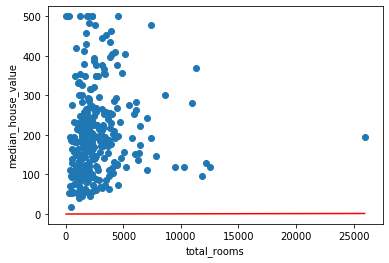

In [39]:
x_0 = sample["total_rooms"].min()
x_1 = sample["total_rooms"].max()

#Retrieve the final weight and bias generated during training
weight = linear_regressor.get_variable_value("linear/linear_model/total_rooms/weights")[0]
bias = linear_regressor.get_variable_value("linear/linear_model/bias_weights")

#Get the predicted median_house_values for the min and max total_rooms values.
y_0 = weight * x_0 + bias
y_1 = weight * x_1 + bias

#Plot our regression line from (x_0,y_0) to (x_1,y_1).
plt.plot([x_0,x_1],[y_0,y_1], c='r')

#Label the graph axes.
plt.ylabel("median_house_value")
plt.xlabel("total_rooms")

#Plot a scatter plot from our data sample.
plt.scatter(sample["total_rooms"],sample["median_house_value"])

#Display the graph.
plt.show()

As we can see the line we have created is way off. We should search for a much better line.

# Hyperparameter fitting

We now include the entire code in a single function for convenience.
We can call the function with different parameters to observe changes.
* In this function we will proceed in 10 evenly divided periods so that we can observe the model improvement at each period.
* For each period, we will compute and graph the training loss. This will help judge when the model converges, or wether it needs more iterations.
* We will plot the feature weight and bias term values learned by the model over time. This is another way to see how the model converges.

In [40]:
def train_model(learning_rate, steps, batch_size, input_feature):
  """Trains a linear regression model of one feature.
  
  Args:
    learning_rate: A `float`, the learning rate.
    steps: A non-zero `int`, the total number of training steps. A training step
      consists of a forward and backward pass using a single batch.
    batch_size: A non-zero `int`, the batch size.
    input_feature: A `string` specifying a column from `california_housing_dataframe`
      to use as input feature.
  """
  
  periods = 15
  steps_per_period = steps / periods

  my_feature = input_feature
  my_feature_data = california_housing_dataframe[[my_feature]]
  my_label = "median_house_value"
  targets = california_housing_dataframe[my_label]

  # Create feature columns.
  feature_columns = [tf.feature_column.numeric_column(my_feature)]
  
  # Create input functions.
  training_input_fn = lambda:my_input_fn(my_feature_data, targets, batch_size=batch_size)
  prediction_input_fn = lambda: my_input_fn(my_feature_data, targets, num_epochs=1, shuffle=False)
  
  # Create a linear regressor object.
  my_optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)
  my_optimizer = tf.contrib.estimator.clip_gradients_by_norm(my_optimizer, 5.0)
  linear_regressor = tf.estimator.LinearRegressor(
      feature_columns=feature_columns,
      optimizer=my_optimizer
  )

  # Set up to plot the state of our model's line each period.
  plt.figure(figsize=(15, 6))
  plt.subplot(1, 2, 1)
  plt.title("Learned Line by Period")
  plt.ylabel(my_label)
  plt.xlabel(my_feature)
  sample = california_housing_dataframe.sample(n=300)
  plt.scatter(sample[my_feature], sample[my_label])
  colors = [cm.coolwarm(x) for x in np.linspace(-1, 1, periods)]

  # Train the model, but do so inside a loop so that we can periodically assess
  # loss metrics.
  print("Training model...")
  print("RMSE (on training data):")
  root_mean_squared_errors = []
  for period in range (0, periods):
    # Train the model, starting from the prior state.
    linear_regressor.train(
        input_fn=training_input_fn,
        steps=steps_per_period
    )
    # Take a break and compute predictions.
    predictions = linear_regressor.predict(input_fn=prediction_input_fn)
    predictions = np.array([item['predictions'][0] for item in predictions])
    
    # Compute loss.
    root_mean_squared_error = math.sqrt(
        metrics.mean_squared_error(predictions, targets))
    # Occasionally print the current loss.
    print("  period %02d : %0.2f" % (period, root_mean_squared_error))
    # Add the loss metrics from this period to our list.
    root_mean_squared_errors.append(root_mean_squared_error)
    # Finally, track the weights and biases over time.
    # Apply some math to ensure that the data and line are plotted neatly.
    y_extents = np.array([0, sample[my_label].max()])
    
    weight = linear_regressor.get_variable_value('linear/linear_model/%s/weights' % input_feature)[0]
    bias = linear_regressor.get_variable_value('linear/linear_model/bias_weights')

    x_extents = (y_extents - bias) / weight
    x_extents = np.maximum(np.minimum(x_extents,
                                      sample[my_feature].max()),
                           sample[my_feature].min())
    y_extents = weight * x_extents + bias
    plt.plot(x_extents, y_extents, color=colors[period]) 
  print("Model training finished.")

  # Output a graph of loss metrics over periods.
  plt.subplot(1, 2, 2)
  plt.ylabel('RMSE')
  plt.xlabel('Periods')
  plt.title("Root Mean Squared Error vs. Periods")
  plt.tight_layout()
  plt.plot(root_mean_squared_errors)

  # Output a table with calibration data.
  calibration_data = pd.DataFrame()
  calibration_data["predictions"] = pd.Series(predictions)
  calibration_data["targets"] = pd.Series(targets)
  display.display(calibration_data.describe())

  print("Final RMSE (on training data): %0.2f" % root_mean_squared_error)

Run the model:
with an input_feature of "total_rooms"

Training model...
RMSE (on training data):
  period 00 : 229.37
  period 01 : 221.50
  period 02 : 213.99
  period 03 : 206.86
  period 04 : 200.15
  period 05 : 193.91
  period 06 : 188.83
  period 07 : 185.08
  period 08 : 181.07
  period 09 : 177.02
  period 10 : 173.77
  period 11 : 171.57
  period 12 : 169.73
  period 13 : 168.61
  period 14 : 167.53
Model training finished.


,predictions,targets
count,17000.0,17000.0
mean,115.3,207.3
std,95.0,116.0
min,0.1,15.0
25%,63.7,119.4
50%,92.7,180.4
75%,137.4,265.0
max,1654.1,500.0


Final RMSE (on training data): 167.53


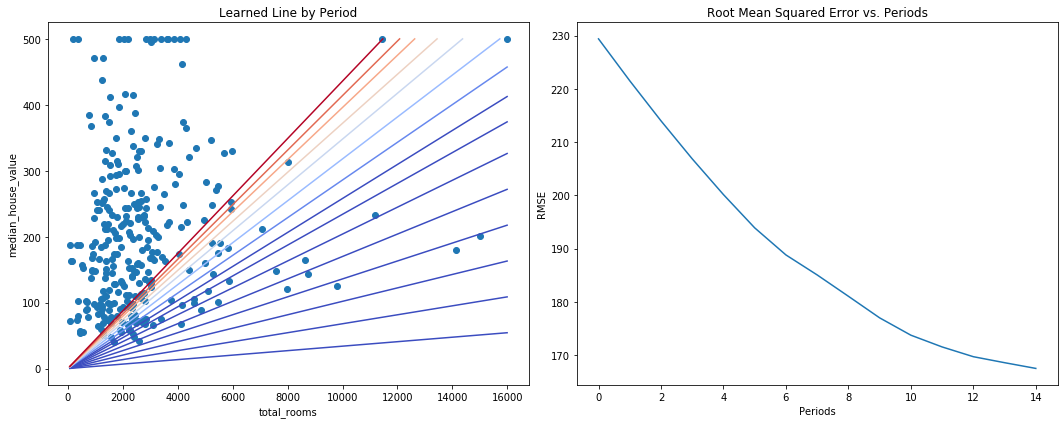

In [41]:
train_model(
learning_rate = 0.00002,
steps = 500,
batch_size=5,
input_feature = "total_rooms")

# Model Tuning Tips:

The effects of different hyperparameters are usually data dependent. There are no rules set in stone, you need to test various parameters on the data.

A few rules of thumb:

* Training error should decrease steadily, steeply at first, and eventually should plateau as training converges.
* If training does not converge, try running it for longer.
* If error decreases slowly, try increasing the learning rate to help it decrease faster. Beware that the opposite may happen if the learning rate is too high.
* If the training error varies wildly, try decreasing the learning reate. A lower learning rate pluys a large number of steps or larger batch size is often a good combination.
* Very small batch sizes often lead to instability. First try larger values like 100, or 1000 and decrease until you see degradation.

# Try a different feature: 
See if we can achieve better results by replacing our total_rooms feature with the population feature.


Training model...
RMSE (on training data):
  period 00 : 233.40
  period 01 : 229.58
  period 02 : 225.63
  period 03 : 221.78
  period 04 : 218.04
  period 05 : 214.41
  period 06 : 210.91
  period 07 : 207.54
  period 08 : 204.86
  period 09 : 201.92
  period 10 : 199.28
  period 11 : 196.59
  period 12 : 193.89
  period 13 : 191.93
  period 14 : 189.52
Model training finished.


,predictions,targets
count,17000.0,17000.0
mean,69.5,207.3
std,55.8,116.0
min,0.1,15.0
25%,38.4,119.4
50%,56.7,180.4
75%,83.6,265.0
max,1734.2,500.0


Final RMSE (on training data): 189.52


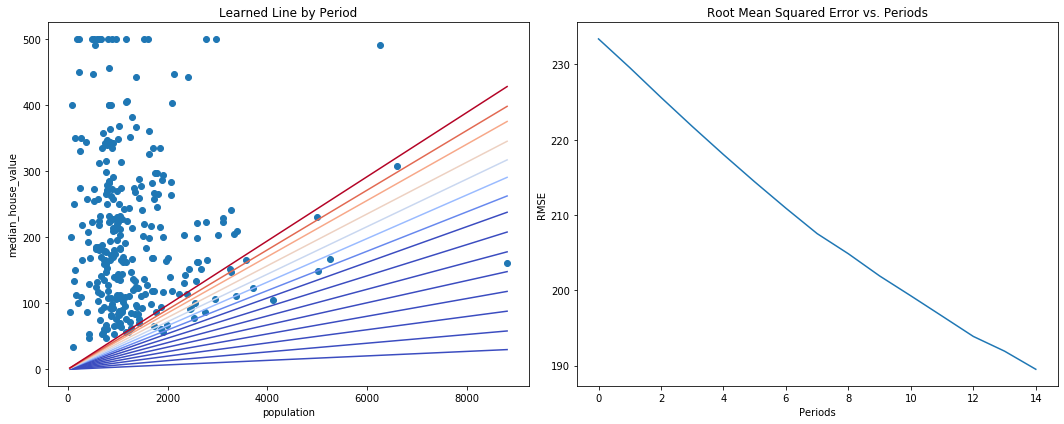

In [42]:
train_model(
learning_rate = 0.00002,
steps = 500,
batch_size=5,
input_feature = "population")